In [1]:
#Importing libraris
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6
from statsmodels.tsa.arima_model import ARIMA
from numpy import log
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [28]:
data = pd.read_csv(r'C:\Users\Pratik G Ratnaparkhi\Desktop\IVY Python\03Case2\AirPassengers.csv')

In [29]:
#Lets do some discripitive analysis
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [31]:
#Lets do Time series Analysis 
data1 = data.rename(columns={'#Passengers': 'Passengers'})
data1

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [32]:
#Changing dtype of date
data1['Month'] = pd.to_datetime(data1['Month'],infer_datetime_format=True)


In [33]:
data1.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [34]:
data2 = data1.set_index(['Month'])
data2.head(30)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


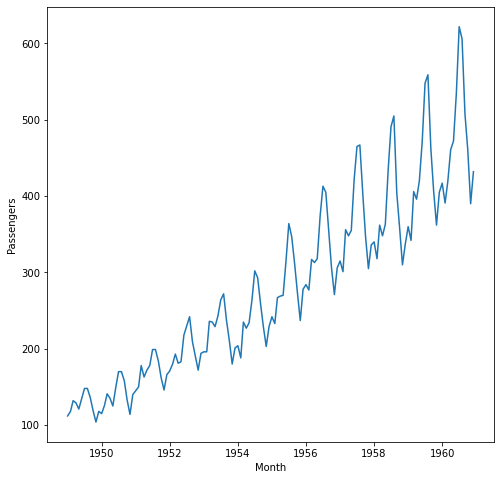

In [35]:
#Lets Explore the Dataset
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.plot(data2)

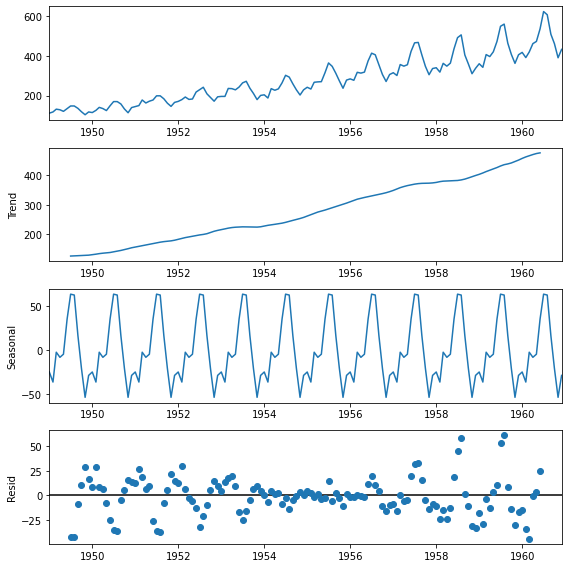

In [36]:
#Lets decompose the Data:-Trend , Seasonal,and Irregular Component
rcParams['figure.figsize']=8,8
decomposition = sm.tsa.seasonal_decompose(data2,model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
#plotting the data
def test_stationarity(pass_data):
    roll_mean = pass_data.rolling(window=12).mean()
    roll_stdv = pass_data.rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    sales = plt.plot(pass_data,color='orange',label='Sale ')
    mean = plt.plot(roll_mean , color = 'blue' , label='mean')
    std = plt.plot(roll_stdv, color = 'black' , label='stdv')
    plt.legend(loc='upper left')
    plt.title('Rolling Mean And Std Deviation')
    plt.show(block=False)

    test = adfuller(pass_data['Passengers'],autolag='AIC')
    testop = pd.Series(test[0:4],index=['Test Statistics','p Value','Lags','Observations'])
    for key , value in test[4].items():
        testop['critical value (%s)'%key] = value
    print(testop)


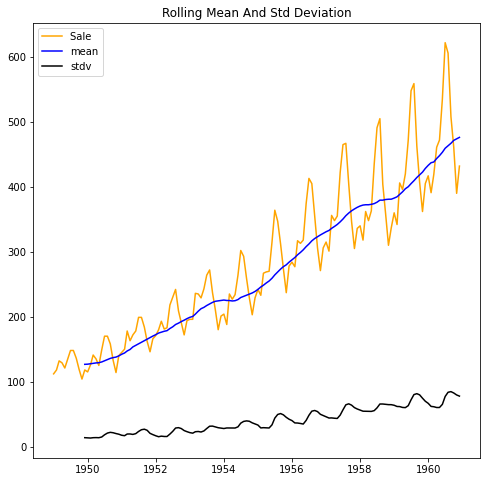

Test Statistics           0.815369
p Value                   0.991880
Lags                     13.000000
Observations            130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [38]:
#Ho = Non-Stationary(p>=0.05)
#H1 = Stationary
test_stationarity(data2)

In [39]:
#from the above our avg is changing proportionally with data
#As p value is greater than 0.05 thats why we will accept the Ho
#here we can say that data is non-stationary

In [40]:
#At first order diffrencing we are getting stationarity

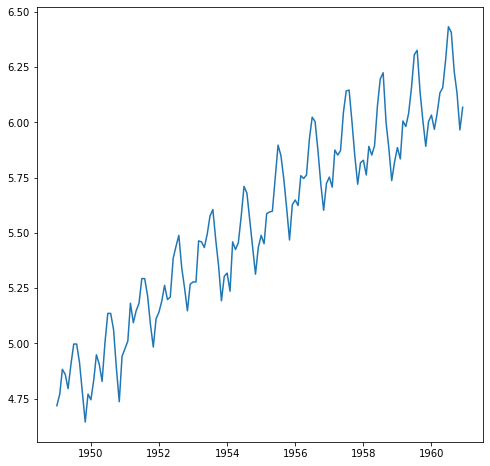

In [41]:
logdata = np.log(data2)
plt.plot(logdata)
plt.show()

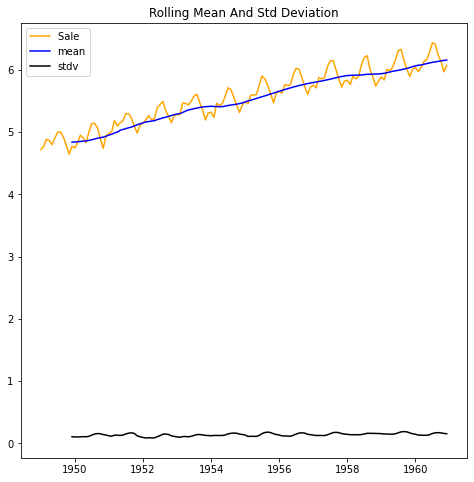

Test Statistics          -1.717017
p Value                   0.422367
Lags                     13.000000
Observations            130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [42]:
test_stationarity(logdata)

In [43]:
logroll_mean = logdata.rolling(window=12).mean()
data4 = logdata-logroll_mean
data4.dropna(inplace=True)
data4.head(12)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


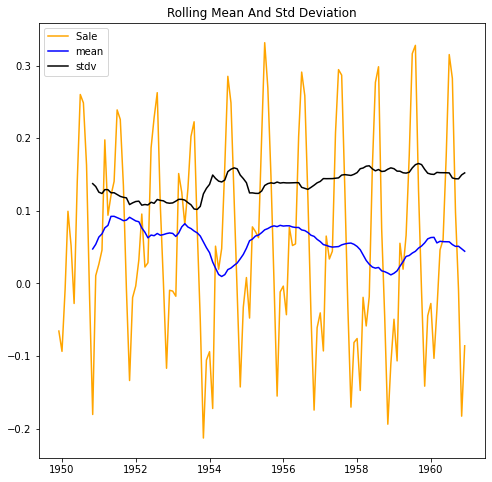

Test Statistics          -3.162908
p Value                   0.022235
Lags                     13.000000
Observations            119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
dtype: float64


In [44]:
test_stationarity(data4)

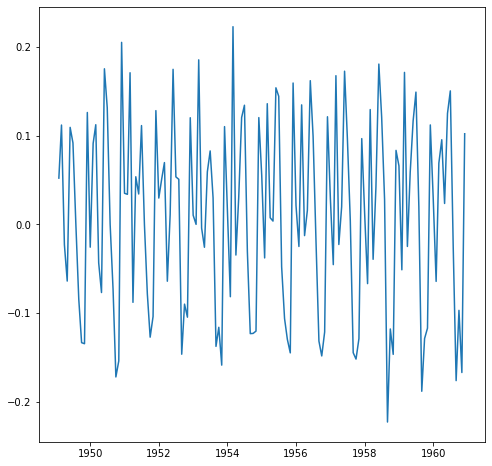

In [45]:
diff = logdata-logdata.shift()
plt.plot(diff)
plt.show()

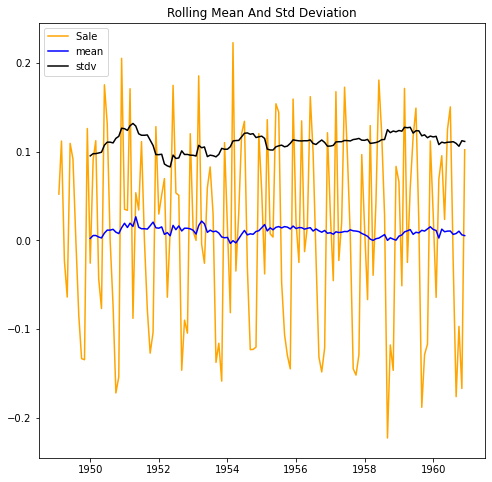

Test Statistics          -2.717131
p Value                   0.071121
Lags                     14.000000
Observations            128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
dtype: float64


In [46]:
diff.dropna(inplace=True)
test_stationarity(diff)

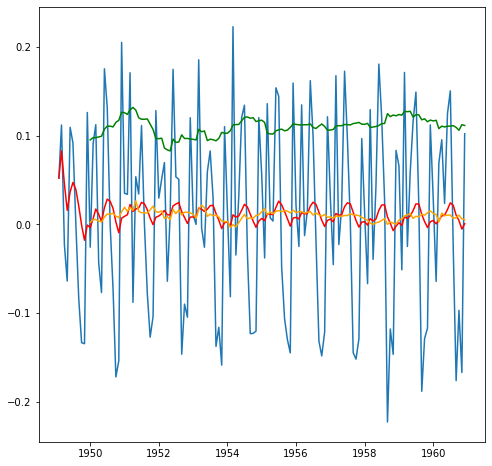

In [47]:
#Calculating the weighted Avg to know the trend which is present
#in time series
roll_mean1 = diff.rolling(window=12).mean()
roll_stdv1 = diff.rolling(window=12).std()
Avg = diff.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(diff)
plt.plot(Avg,color='red')
plt.plot(roll_mean1,'orange')
plt.plot(roll_stdv1,color='green')


C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


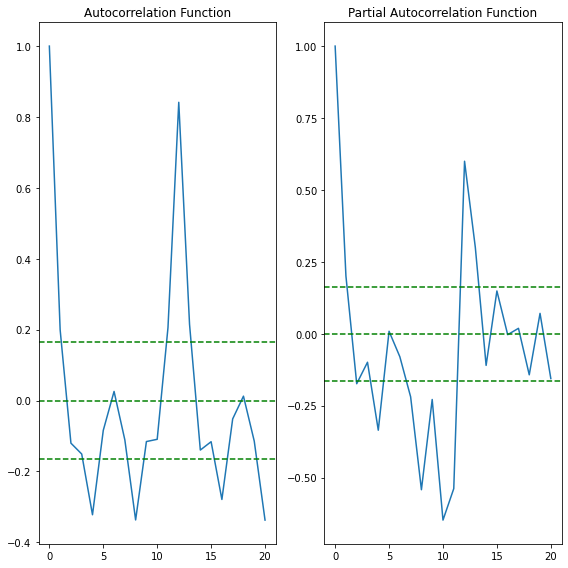

In [48]:
#getting p and q values by ACF and PACF method
from statsmodels.tsa.stattools import acf,pacf
acf1 = acf(diff,nlags=20)
pacf1 = pacf(diff,nlags=20,method='ols')

plt.subplot(121)
plt.plot(acf1)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf1)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [49]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(diff)

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

{'bic':             0           1           2
 0 -225.639206 -228.618781 -228.527575
 1 -226.497365 -229.756336 -250.375467
 2 -225.753257 -255.336987 -269.503740
 3 -222.137562 -252.308119 -249.418687
 4 -232.957928 -253.670744 -253.229736,
 'bic_min_order': (2, 2)}

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


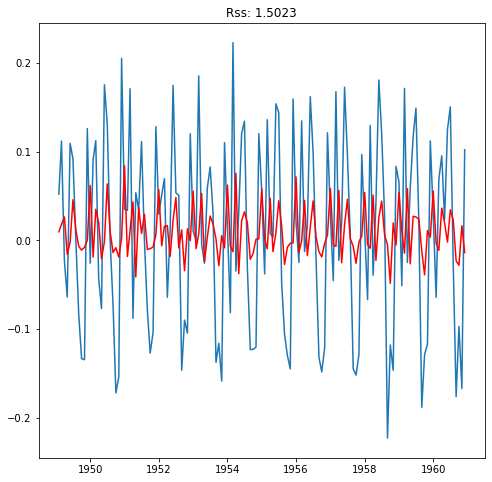

In [52]:
#AR model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(logdata,order=(2,1,0))
results = model.fit(disp=-1)
plt.plot(diff)
plt.plot(results.fittedvalues,color='red')
plt.title('Rss: %.4f'% sum((results.fittedvalues-diff['Passengers'])**2))
plt.show()

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


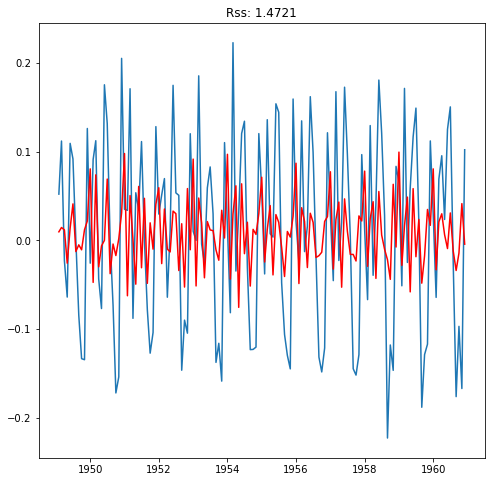

In [53]:
#MA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(logdata,order=(0,1,2))
results = model.fit(disp=-1)
plt.plot(diff)
plt.plot(results.fittedvalues,color='red')
plt.title('Rss: %.4f'% sum((results.fittedvalues-diff['Passengers'])**2))
plt.show()

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and AR

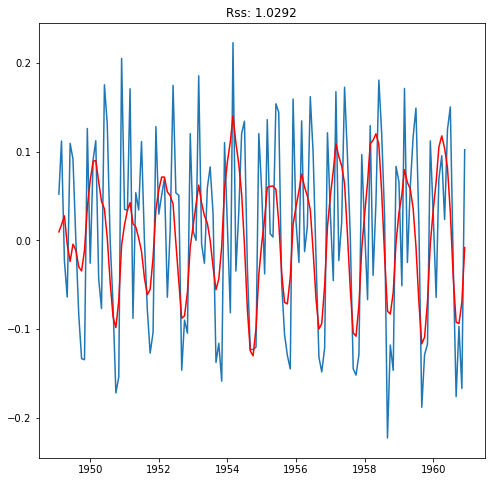

In [54]:
#ARIMA MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(logdata,order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(diff)
plt.plot(results.fittedvalues,color='red')
plt.title('Rss: %.4f'% sum((results.fittedvalues-diff['Passengers'])**2))
plt.show()

In [56]:
#Now lets forecast 
pred = pd.Series(results.fittedvalues,copy=True)
print(pred.head())



Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [57]:
#To get our original data we will use cumsum function
predcs = pred.cumsum()
predcs.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [60]:
#Again the log data need to be convert in the original form
predlog = pd.Series(logdata['Passengers'].iloc[0],index=logdata.index)
predlog = predlog.add(predcs,fill_value=0)
predlog.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

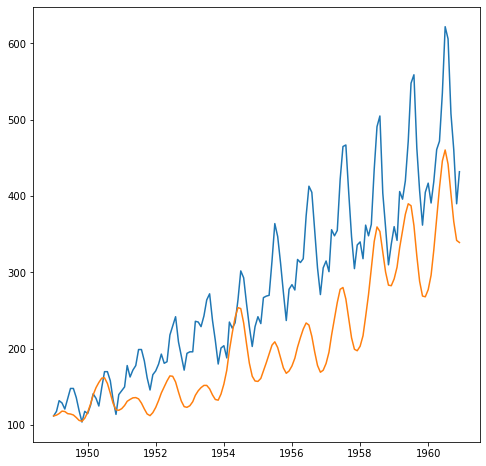

In [61]:
predAR = np.exp(predlog)
plt.plot(data2)
plt.plot(predAR)
plt.show()


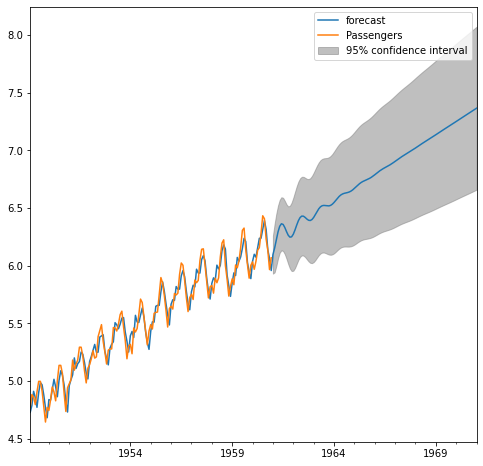

In [62]:
results.plot_predict(1,264)
x=results.forecast(steps=120)

In [63]:
results.forecast(steps=120)

(array([6.09553388, 6.15281398, 6.22442963, 6.29241103, 6.34164724,
        6.36359373, 6.35784698, 6.33139314, 6.29597544, 6.26447712,
        6.24738319, 6.25025163, 6.2727583 , 6.30940312, 6.35151501,
        6.38988671, 6.41727402, 6.43011076, 6.42906708, 6.41842501,
        6.4045616 , 6.39403614, 6.39183078, 6.400195  , 6.41833693,
        6.44295416, 6.46937452, 6.49294009, 6.51024145, 6.51989059,
        6.522676  , 6.52112402, 6.51864536, 6.51853694, 6.52311926,
        6.53322366, 6.5481288 , 6.56591574, 6.58410332, 6.60036567,
        6.61313295, 6.62192808, 6.62737812, 6.63093148, 6.63438704,
        6.63937998, 6.64696518, 6.65739856, 6.67015344, 6.68414275,
        6.69806654, 6.71077932, 6.72157763, 6.73034013, 6.73749838,
        6.74386403, 6.75037345, 6.75782614, 6.76668704, 6.77699847,
        6.78841346, 6.80032884, 6.81207227, 6.82308794, 6.8330717 ,
        6.84202526, 6.85022344, 6.85811251, 6.86617369, 6.8747918 ,
        6.88416333, 6.89426416, 6.90487923, 6.91